The following produces a breakdown of team minutes by player for a club in the form of a horizontal stacked bar graph. Combined with the Excel file attached in this folder, it can be adapted to follow the colour scheme of any team in the Premier League.

In [113]:
# importing NumPy, Pandas, Matplotlib, and Font Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import patches as mpatches
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

In [114]:
# Reading Squad Appearances CSV as taken from FBRef.com
players = pd.read_csv(r'C:\Users\aaron\Documents\spurs.csv', engine='python').fillna(0)
players = players.sort_values(by='Min')

In [117]:
# Creating important statistics that will be used to make and check calculations
players['StartMin'] = players['Mn/Start']*players['Starts']
players['SubMin'] = players['Mn/Sub']*players['Subs']
players['TimeOnBench'] = (90-players['Mn/Start'])*players['Starts'] + (90-players['Mn/Sub'])*players['Subs'] +players['unSub']*90
players['NotInSquadMin'] = (28-players['Starts']-players['Subs']-players['unSub'])*90
players['Check'] = players['StartMin'] + players['SubMin'] + players['TimeOnBench'] + players['NotInSquadMin']

In [118]:
# Creating second DataFrame containing only columns from players that are used to make and check calculations
important = players[['Player', 'StartMin', 'SubMin', 'TimeOnBench', 'NotInSquadMin', 'Check']]

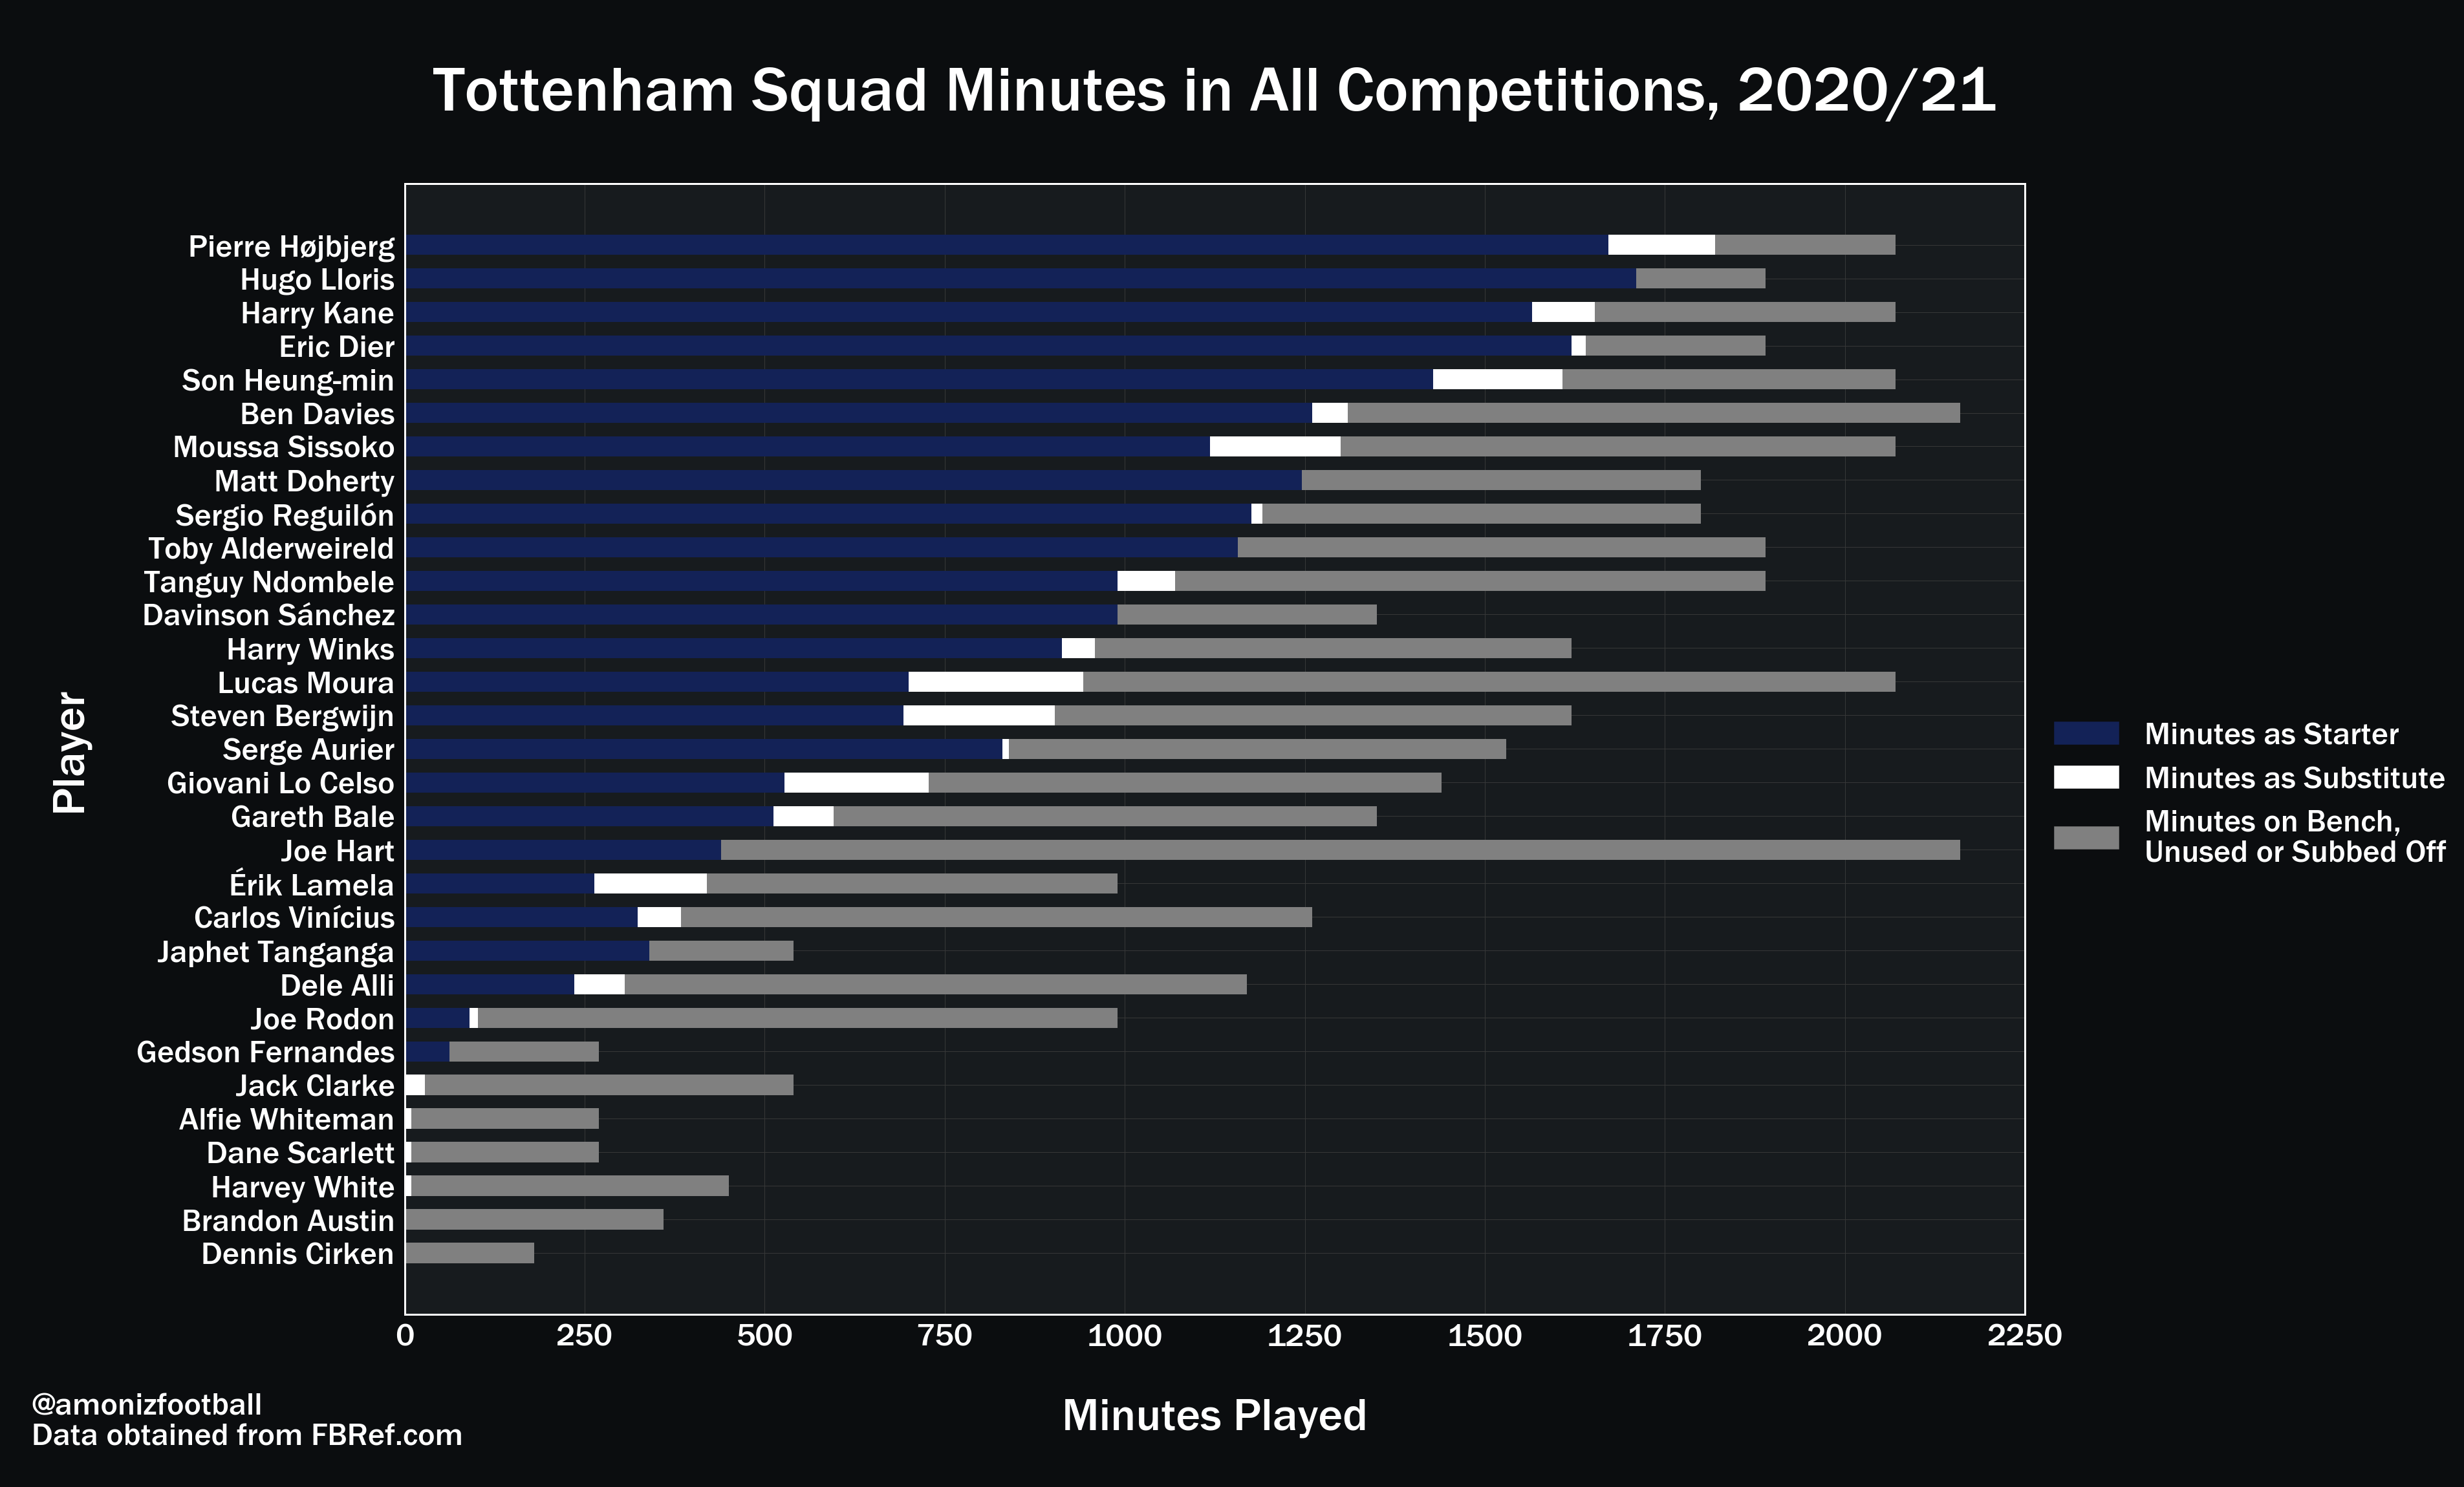

In [119]:
# Squad Name for Chart Generation
squad_name = 'Tottenham'

# Generating bar colours based on squad_name
colours = pd.read_excel(r'C:\Users\aaron\Documents\Team Colours Optimized for Black Background.xlsx')

def picker1(c):
    for i in list(range(0,len(colours))):
        if colours['Club'][i] == c:
            return colours['Col1'][i]

def picker2(c):
    for i in list(range(0,len(colours))):
        if colours['Club'][i] == c:
            return colours['Col2'][i]

primary_color = picker1(squad_name)
secondary_color = picker2(squad_name)

# Defining Bars
pname = important['Player']
startmin = important['StartMin']
submin = important['SubMin']
onbenchmin = important['TimeOnBench']

# Creating Chart and Adding Bars
fig,ax=plt.subplots(figsize=(40,30))
width=0.6

p1 = plt.barh(pname, startmin, width, color=primary_color)
p2 = plt.barh(pname, submin, width, color=secondary_color, left=startmin)
p3 = plt.barh(pname, onbenchmin, width, color='#808080', left=startmin+submin)

# Ticks, Labels, Title
ax.set_title('\n'+ squad_name + ' Squad Minutes in All Competitions, 2020/21\n', fontsize=100, color='white')
ax.tick_params(axis='both', which='major', pad=15)
plt.xticks(fontsize=50, color='white')
plt.yticks(fontsize=50, color='white')
plt.xlabel('\nMinutes Played\n', fontsize=72, color='white')
plt.ylabel('\nPlayer\n', fontsize=72, color='white', ha='center')
plt.xlim(0,2250)

# Legend
yellow_patch = mpatches.Patch(color=primary_color, label='Minutes as Starter')
magenta_patch = mpatches.Patch(color=secondary_color, label='Minutes as Substitute')
cyan_patch = mpatches.Patch(color='#808080', label='Minutes on Bench,\nUnused or Subbed Off')
leg = plt.legend(handles=[yellow_patch, magenta_patch, cyan_patch], bbox_to_anchor=(1,0.55), prop={'size':50})
for text in leg.get_texts():
    plt.setp(text, color = 'white')
frame = leg.get_frame()
frame.set_color('#0b0d0f')

# Design Elements
style.use('fivethirtyeight')
ax.grid(True, color='xkcd:dark grey')
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#171b1e')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)

# Credits
plt.text(-0.23, -0.12, '@amonizfootball\nData obtained from FBRef.com', fontsize=50, \
         horizontalalignment='left', verticalalignment='bottom', color='white', transform=ax.transAxes,zorder=1000)

plt.show()